題目：

(1)
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave
	
- 1, Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

- 2, Compute the spectrum of a sawtooth wave. 
- 3, How does the harmonic structure compare to triangle and square waves?
		
(2)
建立自己的 github 帳號，
把本題的做法寫成 .ipynb，放在該處，
然後提供連結在本課程筆記簿之中。


解法：

In [7]:
# [rySol]

from thinkdsp import Sinusoid
import numpy as np

#
# copy these 2 for references...
#
# class RyTriSignal(Sinusoid):
# class RySqrSignal(Sinusoid):
#

#'''
class RyTriSignal(Sinusoid):
    """ry Represents a triangle signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

class RySqrSignal(Sinusoid):
    """ry Represents a square signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= -1 #上半周 #θ *(-2/np.pi) +1
        x1= +1 #下半周 #θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x       
#'''


class RySawtoothSignal(Sinusoid):
    """ry Represents a sawtooth signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x= -1 + θ/np.pi # 從 -1 開始爬坡，上半週期到達　0,下半周期到達 +1 
       
        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

![](../code/fg/fg_sawtooth.png)

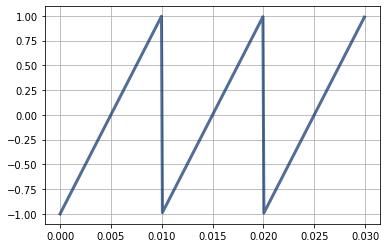

In [8]:
# Let's test what we have created
import matplotlib.pylab as pl

x= RySawtoothSignal(freq=100)
x.plot()
pl.grid()

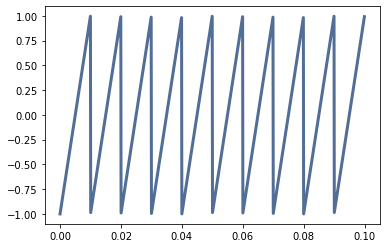

In [9]:
# see and hear it

w= x.make_wave()
w.segment(duration=.1).plot()
w.make_audio()

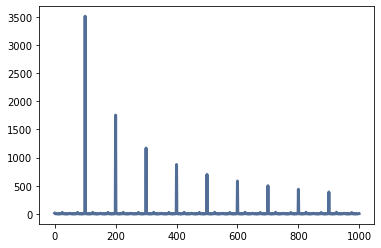

In [10]:
# make its spectrum

s= w.make_spectrum()
s.plot(high=1000)

# you will see the spectrum has both odd and even multiples of 100 Hz